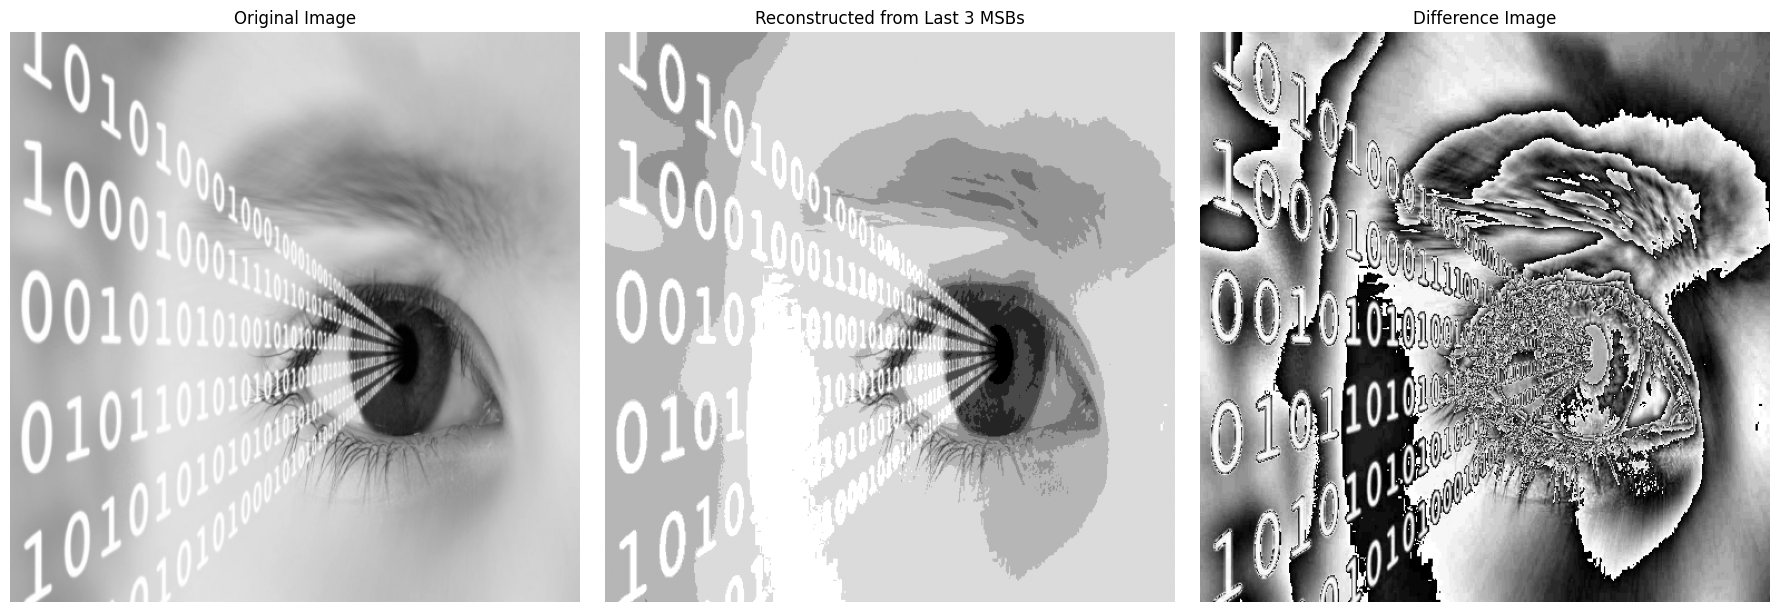

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def extract_msb_image(image, num_bits):

    # Retain only the MSBs and discard the rest
    msb_image = (image >> (8 - num_bits)) << (8 - num_bits)
    return msb_image

# Load a 512x512 grayscale image
image_path = "img.jpg"  # Replace with your image path
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if original_image is None:
    raise ValueError("Could not load the image. Please check the file path.")

# Resize the image if not 512x512
if original_image.shape != (512, 512):
    original_image = cv2.resize(original_image, (512, 512), interpolation=cv2.INTER_AREA)

# Extract the last 3 MSBs
num_bits = 3
msb_image = extract_msb_image(original_image, num_bits)

# Calculate the difference image
difference_image = cv2.absdiff(original_image, msb_image)

# Display the original, MSB reconstructed, and difference images
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(msb_image, cmap='gray')
plt.title(f'Reconstructed from Last {num_bits} MSBs')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(difference_image, cmap='gray')
plt.title('Difference Image')
plt.axis('off')

plt.tight_layout()
plt.show()
